In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from dmba import regressionSummary

In [2]:
_1mg_df = pd.read_csv('1mgData.csv')

In [3]:
_1mg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16944 entries, 0 to 16943
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          16944 non-null  object
 1   pack_size     16944 non-null  object
 2   rating_count  16944 non-null  object
 3   rating        16944 non-null  object
 4   price         16944 non-null  object
 5   mrp           16944 non-null  object
dtypes: object(6)
memory usage: 794.4+ KB


In [4]:
_1mg_df.head(20)

,Name,pack_size,rating_count,rating,price,mrp
0,Tata 1mg Glucosamine HCL 1500 mg Tablets for J...,bottle of 60 tablets,284 ratings,4.1,₹995,₹399
1,"Tata 1mg Multivitamin Supreme, Zinc, Calcium a...",bottle of 60 capsules,820 ratings,4.1,₹995,₹498
2,HealthVit Lgm 500mg Capsule,bottle of 60 capsules,No reviews,Nan,₹1200,₹980
3,Zincovit Tablet,strip of 15 tablets,4433 ratings,4.5,₹105,₹89
4,Tata 1mg Vitamin B Complex Capsules,bottle of 60 capsules,7 ratings,4.6,₹595,₹448
5,Shelcal 500 Tablet,strip of 15 tablets,4345 ratings,4.5,₹119.5,₹111
6,Swisse Ultiboost Co-Enzyme Q10 150mg Capsule,bottle of 50 capsules,No reviews,Nan,₹1899,₹1291
7,"Depura 60000 IU Vitamin D3 Oral Solution, Help...",bottle of 5 ml Oral Solution,603 ratings,4.5,₹94.99,₹93
8,Shelcal XT Tablet,strip of 15 tablets,772 ratings,4.5,₹377.25,₹352
9,Tata 1mg Probiotics 30 Billion CFUs+ Capsule w...,bottle of 60 capsules,12 ratings,4.8,₹595,₹299


In [5]:
_1mg_df['price'] = _1mg_df['price'].apply(lambda x: x.replace('₹', ''))
_1mg_df['mrp'] = _1mg_df['mrp'].apply(lambda x: x.replace('₹', ''))
_1mg_df.head()

,Name,pack_size,rating_count,rating,price,mrp
0,Tata 1mg Glucosamine HCL 1500 mg Tablets for J...,bottle of 60 tablets,284 ratings,4.1,995,399
1,"Tata 1mg Multivitamin Supreme, Zinc, Calcium a...",bottle of 60 capsules,820 ratings,4.1,995,498
2,HealthVit Lgm 500mg Capsule,bottle of 60 capsules,No reviews,Nan,1200,980
3,Zincovit Tablet,strip of 15 tablets,4433 ratings,4.5,105,89
4,Tata 1mg Vitamin B Complex Capsules,bottle of 60 capsules,7 ratings,4.6,595,448


In [6]:
_1mg_df.head(20)

,Name,pack_size,rating_count,rating,price,mrp
0,Tata 1mg Glucosamine HCL 1500 mg Tablets for J...,bottle of 60 tablets,284 ratings,4.1,995,399
1,"Tata 1mg Multivitamin Supreme, Zinc, Calcium a...",bottle of 60 capsules,820 ratings,4.1,995,498
2,HealthVit Lgm 500mg Capsule,bottle of 60 capsules,No reviews,Nan,1200,980
3,Zincovit Tablet,strip of 15 tablets,4433 ratings,4.5,105,89
4,Tata 1mg Vitamin B Complex Capsules,bottle of 60 capsules,7 ratings,4.6,595,448
5,Shelcal 500 Tablet,strip of 15 tablets,4345 ratings,4.5,119.5,111
6,Swisse Ultiboost Co-Enzyme Q10 150mg Capsule,bottle of 50 capsules,No reviews,Nan,1899,1291
7,"Depura 60000 IU Vitamin D3 Oral Solution, Help...",bottle of 5 ml Oral Solution,603 ratings,4.5,94.99,93
8,Shelcal XT Tablet,strip of 15 tablets,772 ratings,4.5,377.25,352
9,Tata 1mg Probiotics 30 Billion CFUs+ Capsule w...,bottle of 60 capsules,12 ratings,4.8,595,299


In [7]:
_1mg_df['price'] = _1mg_df['price'].apply(lambda x: x.replace('No discounts', '0'))
_1mg_df['mrp'] = _1mg_df['mrp'].apply(lambda x: x.replace('MRP', ''))

_1mg_df.head(20)

,Name,pack_size,rating_count,rating,price,mrp
0,Tata 1mg Glucosamine HCL 1500 mg Tablets for J...,bottle of 60 tablets,284 ratings,4.1,995,399
1,"Tata 1mg Multivitamin Supreme, Zinc, Calcium a...",bottle of 60 capsules,820 ratings,4.1,995,498
2,HealthVit Lgm 500mg Capsule,bottle of 60 capsules,No reviews,Nan,1200,980
3,Zincovit Tablet,strip of 15 tablets,4433 ratings,4.5,105,89
4,Tata 1mg Vitamin B Complex Capsules,bottle of 60 capsules,7 ratings,4.6,595,448
5,Shelcal 500 Tablet,strip of 15 tablets,4345 ratings,4.5,119.5,111
6,Swisse Ultiboost Co-Enzyme Q10 150mg Capsule,bottle of 50 capsules,No reviews,Nan,1899,1291
7,"Depura 60000 IU Vitamin D3 Oral Solution, Help...",bottle of 5 ml Oral Solution,603 ratings,4.5,94.99,93
8,Shelcal XT Tablet,strip of 15 tablets,772 ratings,4.5,377.25,352
9,Tata 1mg Probiotics 30 Billion CFUs+ Capsule w...,bottle of 60 capsules,12 ratings,4.8,595,299


In [8]:
_1mg_df['price'].astype(str).astype(float)
_1mg_df['mrp'].astype(str).astype(float)

_1mg_df.dtypes

Name            object
pack_size       object
rating_count    object
rating          object
price           object
mrp             object
dtype: object

In [9]:
_1mg_df['mrp']= pd.to_numeric(_1mg_df['mrp'])
_1mg_df['price']= pd.to_numeric(_1mg_df['price'])
_1mg_df.dtypes

Name             object
pack_size        object
rating_count     object
rating           object
price           float64
mrp             float64
dtype: object

In [10]:
_1mg_df['rating'] = _1mg_df['rating'].apply(lambda x: x.replace('Nan', '0'))
_1mg_df['rating_count'] = _1mg_df['rating_count'].apply(lambda x: x.replace('ratings', ''))
_1mg_df['rating_count'] = _1mg_df['rating_count'].apply(lambda x: x.replace('No reviews', '0'))

_1mg_df.head(20)

,Name,pack_size,rating_count,rating,price,mrp
0,Tata 1mg Glucosamine HCL 1500 mg Tablets for J...,bottle of 60 tablets,284,4.1,995.00,399.0
1,"Tata 1mg Multivitamin Supreme, Zinc, Calcium a...",bottle of 60 capsules,820,4.1,995.00,498.0
2,HealthVit Lgm 500mg Capsule,bottle of 60 capsules,0,0,1200.00,980.0
3,Zincovit Tablet,strip of 15 tablets,4433,4.5,105.00,89.0
4,Tata 1mg Vitamin B Complex Capsules,bottle of 60 capsules,7,4.6,595.00,448.0
5,Shelcal 500 Tablet,strip of 15 tablets,4345,4.5,119.50,111.0
6,Swisse Ultiboost Co-Enzyme Q10 150mg Capsule,bottle of 50 capsules,0,0,1899.00,1291.0
7,"Depura 60000 IU Vitamin D3 Oral Solution, Help...",bottle of 5 ml Oral Solution,603,4.5,94.99,93.0
8,Shelcal XT Tablet,strip of 15 tablets,772,4.5,377.25,352.0
9,Tata 1mg Probiotics 30 Billion CFUs+ Capsule w...,bottle of 60 capsules,12,4.8,595.00,299.0


In [11]:
_1mg_df['rating']= pd.to_numeric(_1mg_df['rating'])
_1mg_df['rating_count']= pd.to_numeric(_1mg_df['rating_count'])
_1mg_df.dtypes

Name             object
pack_size        object
rating_count      int64
rating          float64
price           float64
mrp             float64
dtype: object

In [12]:
_1mg_df['rating'] = _1mg_df['rating'].fillna(0)

In [20]:
_1mg_df.head(20)

,Name,pack_size,rating_count,rating,price,mrp
0,Tata 1mg Glucosamine HCL 1500 mg Tablets for J...,bottle of 60 tablets,284,4.1,995.00,399.0
1,"Tata 1mg Multivitamin Supreme, Zinc, Calcium a...",bottle of 60 capsules,820,4.1,995.00,498.0
2,HealthVit Lgm 500mg Capsule,bottle of 60 capsules,0,0.0,1200.00,980.0
3,Zincovit Tablet,strip of 15 tablets,4433,4.5,105.00,89.0
4,Tata 1mg Vitamin B Complex Capsules,bottle of 60 capsules,7,4.6,595.00,448.0
5,Shelcal 500 Tablet,strip of 15 tablets,4345,4.5,119.50,111.0
6,Swisse Ultiboost Co-Enzyme Q10 150mg Capsule,bottle of 50 capsules,0,0.0,1899.00,1291.0
7,"Depura 60000 IU Vitamin D3 Oral Solution, Help...",bottle of 5 ml Oral Solution,603,4.5,94.99,93.0
8,Shelcal XT Tablet,strip of 15 tablets,772,4.5,377.25,352.0
9,Tata 1mg Probiotics 30 Billion CFUs+ Capsule w...,bottle of 60 capsules,12,4.8,595.00,299.0


In [22]:
_1mg_df.describe()

,rating_count,rating,price,mrp
count,16944.000000,16944.00000,16944.000000,16944.000000
mean,12.768119,0.72490,420.513345,543.644536
std,117.036561,1.59481,899.496951,1168.390621
min,0.000000,0.00000,0.000000,3.000000
25%,0.000000,0.00000,0.000000,101.000000
50%,0.000000,0.00000,140.000000,195.020000
75%,0.000000,0.00000,430.000000,509.000000
max,6269.000000,5.00000,23988.000000,25599.000000


In [13]:
predictor = ['rating','rating_count','mrp']
outcome = ['price']

In [14]:
X = _1mg_df[predictor]
y = _1mg_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=123)

In [15]:
X.shape

(16944, 3)

In [16]:
_1mg_lm = LinearRegression()
_1mg_lm.fit(train_X, train_y)

LinearRegression()

In [17]:
print('intercept ', _1mg_lm.intercept_)

intercept  [181.67481354]


In [18]:
_1mg_lm.coef_

array([[29.15990624, -0.12905022,  0.41609716]])

In [24]:
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': _1mg_lm.coef_.flatten()}))

      Predictor  coefficient
0        rating    29.159906
1  rating_count    -0.129050
2           mrp     0.416097


In [25]:
# print performance measures
regressionSummary(train_y, _1mg_lm.predict(train_X))


Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 792.0697
     Mean Absolute Error (MAE) : 377.0985


In [32]:
_1mg_lm_pred = _1mg_lm.predict(valid_X)

In [40]:
result = pd.DataFrame({'Predicted': _1mg_lm_pred.flatten(), 'Actual': valid_y['price'],
                       'Residual': valid_y['price'] - _1mg_lm_pred.flatten()})
print(result.head(10))

# Compute common accuracy measures
regressionSummary(valid_y, _1mg_lm_pred)

         Predicted   Actual     Residual
16154   222.452335   115.00  -107.452335
4211    822.048336  2199.00  1376.951664
6252   2296.613166  6547.00  4250.386834
7336    389.654713   259.00  -130.654713
15529   211.217712    71.42  -139.797712
15759   380.569254   525.00   144.430746
5744    396.438900   260.00  -136.438900
4856    393.884363   599.70   205.815637
6834    596.442650   900.00   303.557350
9519    244.505484   178.00   -66.505484

Regression statistics

               Mean Error (ME) : -34.3014
Root Mean Squared Error (RMSE) : 742.8955
     Mean Absolute Error (MAE) : 360.1129


0.9527884331661257


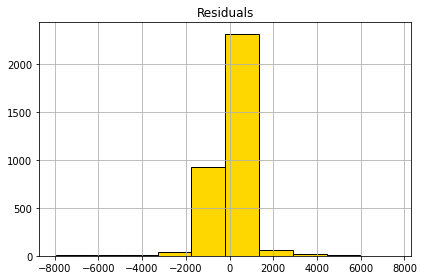

In [45]:
_1mg_lm_pred = _1mg_lm.predict(valid_X)
all_residuals = valid_y['price'] - _1mg_lm_pred.flatten()

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=10, color = 'Gold', edgecolor = 'k')

plt.tight_layout()
plt.show()